## Visualize Summary Statistics with Pandas

In [1]:
import pandas as pd

In [2]:
# Example warehouse data set
rate = pd.read_csv('make_rate.csv')
rate.head()

,products,process,months,rate
0,700,18,5,1
1,600,34,4,0
2,200,18,2,0
3,600,12,3,0
4,263,60,4,0


In [3]:
# Descriptive (summary) statistics
rate[['products', 'process', 'months']].describe()

,products,process,months
count,100.000000,100.000000,100.00000
mean,1136.540000,25.950000,5.65000
std,675.049469,13.920681,3.32233
min,100.000000,7.000000,1.00000
25%,590.000000,13.750000,3.00000
50%,1000.000000,25.000000,5.00000
75%,1666.250000,34.250000,8.00000
max,2450.000000,60.000000,12.00000


In [4]:
rate.mean()

products    1136.54
process       25.95
months         5.65
rate           0.49
dtype: float64

In [5]:
rate.median()

products    1000.0
process       25.0
months         5.0
rate           0.0
dtype: float64

In [6]:
# range
rate['products'].max() - rate['products'].min()

2350

In [7]:
# variance
rate['products'].var()

455691.78626262594

In [8]:
#standard deviation
import math
from math import sqrt

# import math
math.sqrt(rate['products'].var())

675.0494694928854

In [9]:
rate['products'].std()

675.0494694928854

In [10]:
#75th percentile
q3 = rate['products'].quantile(0.75)
q3

1666.25

In [11]:
#25th percentile
q1 = rate['products'].quantile(0.25)
q1

590.0

In [12]:
# interquartile range
iqr = q3  - q1
iqr

1076.25

### Histogram and Scatterplots

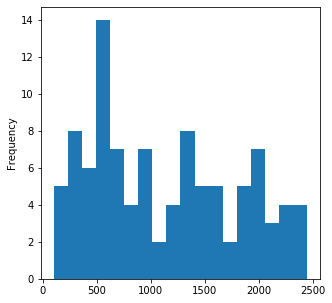

In [17]:
# histogram plot
rate['products'].plot(kind='hist', bins=18, figsize=(5,5))

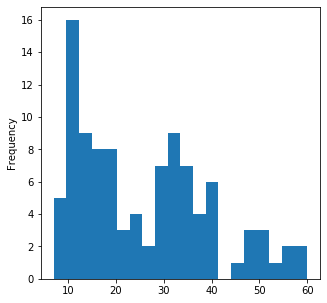

In [19]:
# histogram plot
rate['process'].plot(kind='hist', bins=20, figsize=(5,5))

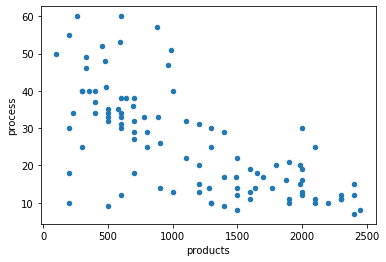

In [20]:
# scatterplot
rate.plot(kind='scatter', x='products', y='process')

In [21]:
# correlation
rate['products'].corr(rate['process'])

-0.6843278599334601

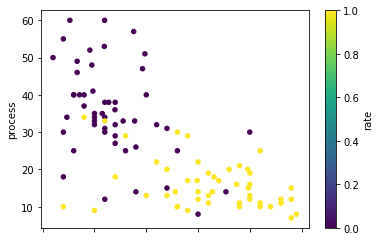

In [22]:
# plot scatterplot, using colormap
rate.plot.scatter(x ='products',y ='process', c='rate',colormap='viridis')

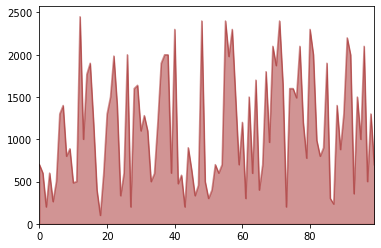

In [23]:
# plot area
rate['products'].plot.area(alpha=0.5, color = 'brown')

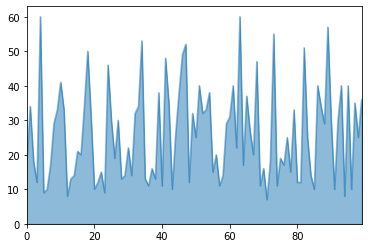

In [24]:
# plot area
rate['process'].plot.area(alpha=0.5)

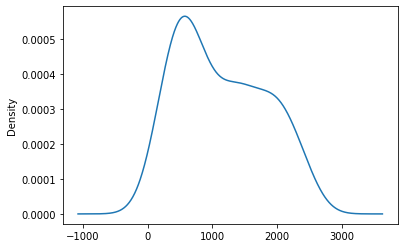

In [25]:
# Plot kernel density plot
rate['products'].plot(kind='kde')

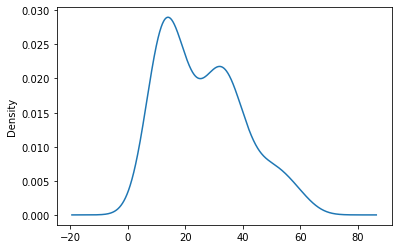

In [26]:
# Plot kernel density plot
rate['process'].plot(kind='kde')

### Boxplots

Boxplot shows the maximum and minimum values through the whiskers.  The median is the line drawn horizontally wihin the box. The potential outliers are the small circles that extend out at either ends.  The top of box is the 75th percentile and the bottom of the box is the 25th percentile.  The interquartile range is all the values that fall inside the box.

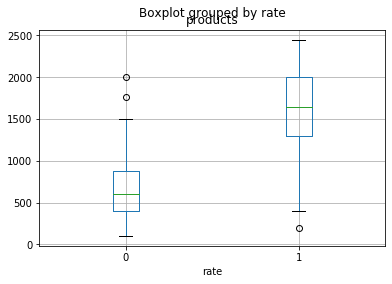

In [27]:
# boxplot
box1 = rate.boxplot(column=['products'], by='rate')

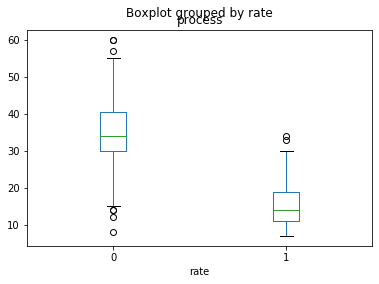

In [28]:
# boxplot
box2 = rate.boxplot(column=['process'], by='rate', grid=False)

### Skewness

Skewness measures how much a distribution differs from a normal distribution.  The distribution is not symmetical around the center. There is more data, either to the left or right side.

Positively skewed: Most frequent values are low and tail is towards high values.
Negatively skewed: Most frequent values are high and tail is towards low values.
    
If Mode< Median< Mean then the distribution is positively skewed.
If Mode> Median> Mean then the distribution is negatively skewed.

In [29]:
# Skewness
rate['products'].skew()

0.33542007736045437

In [30]:
prod_mode = rate['products'].mode()
prod_median = rate['products'].median()
prod_mean = rate['products'].mean()

In [31]:
print(prod_mode)

0    600
dtype: int64


In [32]:
print(prod_median)

1000.0


In [33]:
print(prod_mean)

1136.54


In [34]:
prod_mode < prod_median

0    True
dtype: bool

In [35]:
prod_median < prod_mean

True

Conclusion: The distribution of products is positively skewed.
Most frequent values are low and tail is towards high values.

## Kurtosis

Kurtosis deals with shape of the distribution by focusing on the tail, relative to the center of the distribution. When kurtosis is present then the tails further extend farther than the + and — standard deviations of the normal bell-curved distribution. Kurtosis makes the data look flatter (or less flat as compared to normal distribution). The standard normal distribution has kurtosis of 3.

K = 3 is called Mesokurtic distribution

K > 3 is called Leptokurtic (thin) distribution, has positive kurtosis

K < 3 is called platykurtic (flat) distribution, has negative kurtosis

In [36]:
rate['products'].kurt()

-1.156288942706048

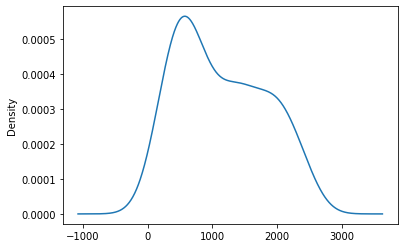

In [37]:
# Plot kernel density plot
rate['products'].plot(kind='kde')

We can conclude that that products has a flat distribution, hence negative kurtosis.

In [ ]:
# end